## Gouthami Suvarna
# Task 2 : Prediction Using Unsupervised Learning

#The Spark Foundation

In [6]:
#Import all the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
print('All libraries imported successfully')

All libraries imported successfully


In [7]:
##Importing the 'Iris' dataset
data = pd.read_csv('iris.csv')
print('Data imported successfully')

Data imported successfully


#Reading the data

In [8]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
print(data.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [10]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [12]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [13]:
print(data.Species.nunique())

3


In [14]:
print(data.Species.value_counts())

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


Therefore the data has three different types of flower species namely: Iris-setosa, Iris=virhinica, Iris-versicolor each having 50 diferent charateristics

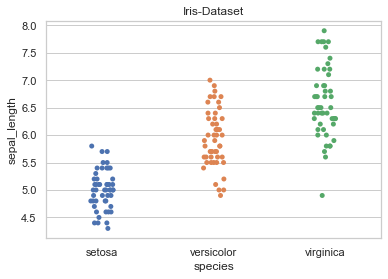

In [15]:
#Setting the seaborn theme and visualising the dataset
sns.set(style='whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x='species',y='sepal_length',data=iris);
plt.title('Iris-Dataset')
plt.show()

Visualising the relationship between species and sepal width

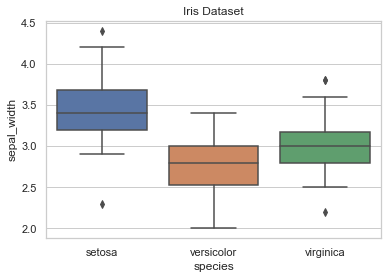

In [16]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title('Iris Dataset')
plt.show()

Visualising the relationship between species and petal Width

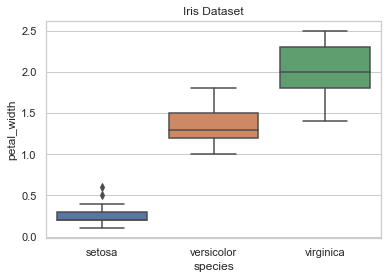

In [17]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title('Iris Dataset')
plt.show()

Visualising the realationship between species and petal length

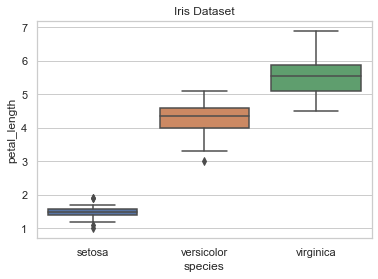

In [18]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title('Iris Dataset')
plt.show()

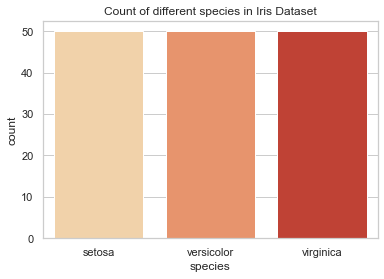

In [21]:
sns.countplot(x='species',data=iris,palette='OrRd')
plt.title("Count of different species in Iris Dataset")
plt.show()

Producing the Heat map

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


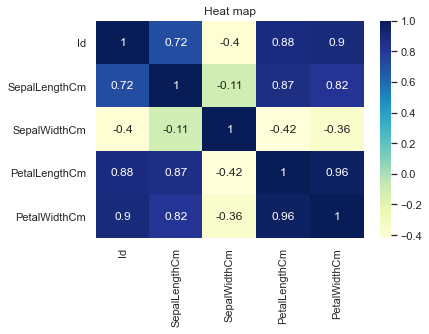

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
print(data.corr())#Printing the coulmns ideal for the plot
plt.title('Heat map')
plt.show()

In [27]:
x=data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
print("Kmeans cluster imported successfully!")

Kmeans cluster imported successfully!


Finding optimal numer of clusters using the elbow method

k: 1 items: 281831.54466666654
k: 2 items: 70581.3808
k: 3 items: 31320.711199999994
k: 4 items: 17762.657226173542
k: 5 items: 11423.238080088988
k: 6 items: 7909.5306730769225
k: 7 items: 5881.448116883118
k: 8 items: 4562.780079365082
k: 9 items: 3579.7205612745106
k: 10 items: 2968.4914326653743


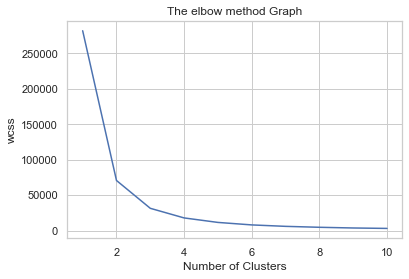

In [39]:
wcss=[]#Creating a empty list
for i in range(1,11):#Creating for loop for iterations from 1 to 10
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print("k:",i,"items:",kmeans.inertia_)
   
plt.plot(range(1,11), wcss)
plt.title('The elbow method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

Initialising K-Means with Optimum number of cluters 

In [41]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Visualising the clusters

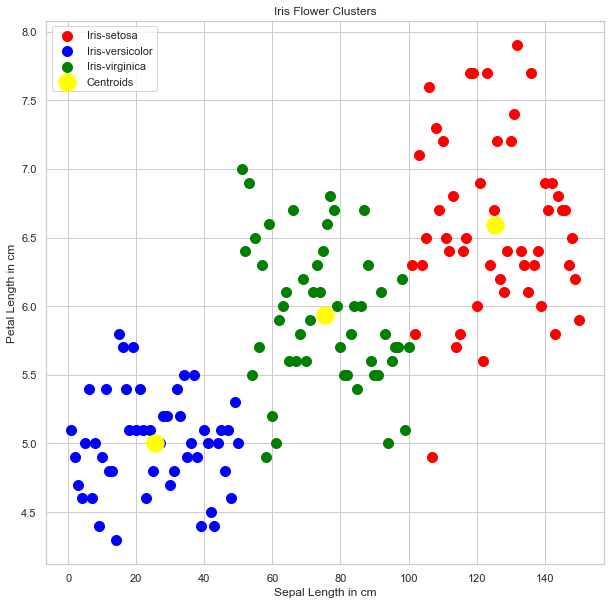

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

Task #2 Completed